2. Data

In [ ]:
import numpy as np

Nr = int(input("Entrez le nombre de barre : "))
Nn = int(input("Entrez le le nombre de noeuds: "))

Module = np.zeros((Nr))
Section = np.zeros((Nr))
Coord = np.zeros(((Nn), 2))
Connec = np.zeros(((Nr), 2))

for i in range(int(Nr)):
    Module[i] = float(input(f"Entrez le module d'Young de la barre numéro {i+1}: "))
    Section[i] = float(input(f"Entrez la section de la barre numéro {i+1}: "))

coord_unique = []
print("\n--- Saisie des Coordonnées ---")
for i in range(int(Nn)):
    unique = False
    while unique == False:
        unique = True
        x = float(input(f"Entrez la coordonnée 'x' du noeud numéro {i+1}: "))
        y = float(input(f"Entrez la coordonnée 'y' du noeud numéro {i+1}: "))
        point_actuel = [x, y]
        if point_actuel in coord_unique:
            print(f"Le point ({x}, {y}) existe déjà. Veuillez entrer des coordonnées différentes.")
            unique = False
            continue
    coord_unique.append([x, y])
    Coord[i, 0] = x
    Coord[i, 1] = y

barre_unique = []
print("\n--- Saisie de la Connectivité ---")
for i in range(int(Nr)):
    pt_depart = 0
    pt_arrivee = 0
    unique = False

    while pt_depart == 0 or pt_depart == pt_arrivee or unique == False:
        unique = True

        while not (0 < pt_depart <= int(Nn)):
            pt_depart = int(input(f"Entrez le numéro du point de départ de la barre numéro {i+1} compris entre 1 et {Nn}: "))

        while not (0 < pt_arrivee <= int(Nn)):
            pt_arrivee = int(input(f"Entrez le numéro du point d'arrivée de la barre numéro {i+1} compris entre 1 et {Nn}: "))

        if pt_depart == pt_arrivee:
            print("Erreur: Les points doivent être différents.")
            pt_depart = 0
            pt_arrivee = 0
            continue

        barre_actuelle = sorted([pt_depart, pt_arrivee])

        if barre_actuelle in barre_unique:
            print("Cette barre existe déjà")
            unique = False
            pt_depart = 0
            pt_arrivee = 0
            continue

    barre_unique.append(sorted([pt_depart, pt_arrivee]))
    Connec[i, 0] = pt_depart
    Connec[i, 1] = pt_arrivee

print(f"\nNombre de barres : {Nr}")
print(f"Nombre de noeuds : {Nn}")
print(f"\nModule d'Young de chaque barre :\n{Module}")
print(f"\nSection de chaque barre :\n{Section}")
print(f"\nCoordonnées de chaque noeuds :\n{Coord}")
print(f"\nConnectivité de chaque barre :\n{Connec}")


Entrez le nombre de barre : 7
Entrez le le nombre de noeuds: 5
Entrez le module d'Young de la barre numéro 1: 210000000000
Entrez la section de la barre numéro 1: 0.005
Entrez le module d'Young de la barre numéro 2: 210000000000
Entrez la section de la barre numéro 2: 0.005
Entrez le module d'Young de la barre numéro 3: 210000000000
Entrez la section de la barre numéro 3: 0.005
Entrez le module d'Young de la barre numéro 4: 210000000000
Entrez la section de la barre numéro 4: 0.005
Entrez le module d'Young de la barre numéro 5: 210000000000
Entrez la section de la barre numéro 5: 0.005
Entrez le module d'Young de la barre numéro 6: 210000000000
Entrez la section de la barre numéro 6: 0.005
Entrez le module d'Young de la barre numéro 7: 210000000000
Entrez la section de la barre numéro 7: 0.005

--- Saisie des Coordonnées ---
Entrez la coordonnée 'x' du noeud numéro 1: 0
Entrez la coordonnée 'y' du noeud numéro 1: 0
Entrez la coordonnée 'x' du noeud numéro 2: 2
Entrez la coordonnée 'y' 

3. Outline

Calcul de Length et Orient


In [ ]:
import math

Length = np.zeros(int(Nr))

for i in range(int(Nr)):
    noeud_depart = int(Connec[i, 0])- 1
    noeud_arrivee = int(Connec[i, 1]) - 1

    x1 = Coord[noeud_depart, 0]
    y1 = Coord[noeud_depart, 1]

    x2 = Coord[noeud_arrivee, 0]
    y2 = Coord[noeud_arrivee, 1]

    L = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    Length[i] = L

print(f"Longueurs : {Length}")


Orient = np.zeros(int(Nr))

for i in range(int(Nr)):
    noeud_depart = int(Connec[i, 0]) - 1
    noeud_arrivee = int(Connec[i, 1]) - 1
    x1 = Coord[noeud_depart, 0]
    y1 = Coord[noeud_depart, 1]

    x2 = Coord[noeud_arrivee, 0]
    y2 = Coord[noeud_arrivee, 1]

    theta = math.atan2(y2 - y1, x2 - x1) #Pas atan car on veut l'angle depuis la même réference en prenant le crecle trigo

    Orient[i] = theta

print(f"Orientations (en radians) : {Orient}")

print(f"Orientations (en degrés) : {np.degrees(Orient)}")

Longueurs : [2.         2.         2.         1.41421356 1.41421356 1.41421356
 1.41421356]
Orientations (en radians) : [ 0.          0.          0.          0.78539816 -0.78539816  0.78539816
 -0.78539816]
Orientations (en degrés) : [  0.   0.   0.  45. -45.  45. -45.]


Matrice de rigidité élementaire et globale

In [ ]:

K = np.zeros((int(2*Nn), int(2*Nn)))
Ke = np.zeros((4, 4))

for i in range(int(Nr)):
    E = Module[i]
    S = Section[i]
    L = Length[i]
    theta = Orient[i]
    c = math.cos(theta)
    s = math.sin(theta)

    Ke = ((E*S)/L) * np.array([
        [ c*c,  c*s, -c*c, -c*s],
        [ c*s,  s*s, -c*s, -s*s],
        [-c*c, -c*s,  c*c,  c*s],
        [-c*s, -s*s,  c*s,  s*s]
    ])

    print(f"Matrice de rigidité de la barre {i+1} : \n{Ke}\n")

    for j in range(1, 3):
        for k in range(1, 3):
            noeud_J = int(Connec[i, j-1])
            noeud_K = int(Connec[i, k-1])


            K[2*noeud_J - 2, 2*noeud_K - 2] += Ke[2*j - 2, 2*k - 2]

            K[2*noeud_J - 1, 2*noeud_K - 2] += Ke[2*j - 1, 2*k - 2]

            K[2*noeud_J - 2, 2*noeud_K - 1] += Ke[2*j - 2, 2*k - 1]

            K[2*noeud_J - 1, 2*noeud_K - 1] += Ke[2*j - 1, 2*k - 1]

print(f"Matrice de rigidité globale : \n{K}")







Matrice de rigidité de la barre 1 : 
[[ 5.25e+08  0.00e+00 -5.25e+08 -0.00e+00]
 [ 0.00e+00  0.00e+00 -0.00e+00 -0.00e+00]
 [-5.25e+08 -0.00e+00  5.25e+08  0.00e+00]
 [-0.00e+00 -0.00e+00  0.00e+00  0.00e+00]]

Matrice de rigidité de la barre 2 : 
[[ 5.25e+08  0.00e+00 -5.25e+08 -0.00e+00]
 [ 0.00e+00  0.00e+00 -0.00e+00 -0.00e+00]
 [-5.25e+08 -0.00e+00  5.25e+08  0.00e+00]
 [-0.00e+00 -0.00e+00  0.00e+00  0.00e+00]]

Matrice de rigidité de la barre 3 : 
[[ 5.25e+08  0.00e+00 -5.25e+08 -0.00e+00]
 [ 0.00e+00  0.00e+00 -0.00e+00 -0.00e+00]
 [-5.25e+08 -0.00e+00  5.25e+08  0.00e+00]
 [-0.00e+00 -0.00e+00  0.00e+00  0.00e+00]]

Matrice de rigidité de la barre 4 : 
[[ 3.7123106e+08  3.7123106e+08 -3.7123106e+08 -3.7123106e+08]
 [ 3.7123106e+08  3.7123106e+08 -3.7123106e+08 -3.7123106e+08]
 [-3.7123106e+08 -3.7123106e+08  3.7123106e+08  3.7123106e+08]
 [-3.7123106e+08 -3.7123106e+08  3.7123106e+08  3.7123106e+08]]

Matrice de rigidité de la barre 5 : 
[[ 3.7123106e+08 -3.7123106e+08 -3.7123

Entrée des conditions limites

In [ ]:
BC_Ux = np.zeros(int(Nn))
BC_Uy = np.zeros(int(Nn))
BC_Fx = np.zeros(int(Nn))
BC_Fy = np.zeros(int(Nn))

VAL_Ux = np.zeros(int(Nn))
VAL_Uy = np.zeros(int(Nn))
VAL_Fx = np.zeros(int(Nn))
VAL_Fy = np.zeros(int(Nn))

for i in range(int(Nn)):
    print(f"Noeud {i+1}\n")

    choix_ux = int(input(f"U_x{i+1} est-il bloqué ? (0 = Non et 1= Oui)"))
    if choix_ux == 1:
        BC_Ux[i] =1
        VAL_Ux[i] = float(input(f"Entrez la valeur de U_x{i+1} : "))
    else:
      BC_Ux[i] = 0

    choix_uy = int(input(f"U_y{i+1} est-il bloqué ? (0 = Non et 1= Oui)"))
    if choix_uy == 1:
        BC_Uy[i] =1
        VAL_Uy[i] = float(input(f"Entrez la valeur de U_y{i+1} : "))
    else:
      BC_Uy[i] = 0


    if BC_Ux[i]==0:
      choix_fx = int(input(f"F_x{i+1} est-il bloqué ? (0 = Non et 1= Oui)"))
      if choix_fx == 1:
        BC_Fx [i] = 1
        VAL_Fx[i] = float(input(f"Entrez la valeur de F_x{i+1} : "))
      else:
        BC_Fx[i] = 0

    if BC_Uy[i]==0:
      choix_fy = int(input(f"F_y{i+1} est-il bloqué ? (0 = Non et 1= Oui)"))
      if choix_fy == 1:
        BC_Fy [i] = 1
        VAL_Fy[i] = float(input(f"Entrez la valeur de F_y{i+1} : "))
      else:
        BC_Fy[i] = 0

N_BC_U = 0
for i in range(int(Nn)):
  N_BC_U += int(BC_Ux[i] + BC_Uy[i])

print(f"Nombre de BC_U : {N_BC_U}")






Noeud 1

U_x1 est-il bloqué ? (0 = Non et 1= Oui)1
Entrez la valeur de U_x1 : 0
U_y1 est-il bloqué ? (0 = Non et 1= Oui)1
Entrez la valeur de U_y1 : 0
Noeud 2

U_x2 est-il bloqué ? (0 = Non et 1= Oui)0
U_y2 est-il bloqué ? (0 = Non et 1= Oui)0
F_x2 est-il bloqué ? (0 = Non et 1= Oui)0
F_y2 est-il bloqué ? (0 = Non et 1= Oui)1
Entrez la valeur de F_y2 : -100000
Noeud 3

U_x3 est-il bloqué ? (0 = Non et 1= Oui)0
U_y3 est-il bloqué ? (0 = Non et 1= Oui)1
Entrez la valeur de U_y3 : 0
F_x3 est-il bloqué ? (0 = Non et 1= Oui)0
Noeud 4

U_x4 est-il bloqué ? (0 = Non et 1= Oui)0
U_y4 est-il bloqué ? (0 = Non et 1= Oui)0
F_x4 est-il bloqué ? (0 = Non et 1= Oui)0
F_y4 est-il bloqué ? (0 = Non et 1= Oui)0
Noeud 5

U_x5 est-il bloqué ? (0 = Non et 1= Oui)0
U_y5 est-il bloqué ? (0 = Non et 1= Oui)0
F_x5 est-il bloqué ? (0 = Non et 1= Oui)0
F_y5 est-il bloqué ? (0 = Non et 1= Oui)0
Nombre de BC_U : 3


Matrice de rigidité réduite

In [ ]:
K_red = np.zeros((int(2*Nn)-N_BC_U, int(2*Nn)-N_BC_U))



Row_Column_elimin = np.zeros(2*int(Nn))
for i in range(int(Nn)):
  if BC_Ux[i] == 1:
    Row_Column_elimin[2*i] =1
  if BC_Uy [i] == 1:
    Row_Column_elimin[2*i+1] =1
print(f"Tableau d'élimination : \n{Row_Column_elimin}\n")

K_red_inter = np.zeros((int(2*Nn)-N_BC_U, int(2*Nn)))
k = 0
for i in range(2*int(Nn)):
  if Row_Column_elimin[i] ==0:
    for j in range(2*int(Nn)):
      K_red_inter[k, j] = K[i, j]
    k += 1

print(f"Matrice de rigidité réduite intermédiaire : \n{K_red_inter}\n")

k = 0
for j in range(2*int(Nn)):
  if Row_Column_elimin[j] == 0:
    for i in range(int(2*Nn)-N_BC_U):
      K_red[i, k] = K_red_inter[i, j]
    k += 1
print(f"Matrice de rigidité réduite :\n{K_red}")




Tableau d'élimination : 
[1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]

Matrice de rigidité réduite intermédiaire : 
[[-5.25000000e+08  0.00000000e+00  1.79246212e+09  0.00000000e+00
  -5.25000000e+08  0.00000000e+00 -3.71231060e+08  3.71231060e+08
  -3.71231060e+08 -3.71231060e+08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.42462120e+08
   0.00000000e+00  0.00000000e+00  3.71231060e+08 -3.71231060e+08
  -3.71231060e+08 -3.71231060e+08]
 [ 0.00000000e+00  0.00000000e+00 -5.25000000e+08  0.00000000e+00
   8.96231060e+08 -3.71231060e+08  0.00000000e+00  0.00000000e+00
  -3.71231060e+08  3.71231060e+08]
 [-3.71231060e+08 -3.71231060e+08 -3.71231060e+08  3.71231060e+08
   0.00000000e+00  0.00000000e+00  1.26746212e+09  0.00000000e+00
  -5.25000000e+08  0.00000000e+00]
 [-3.71231060e+08 -3.71231060e+08  3.71231060e+08 -3.71231060e+08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.42462120e+08
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.71231060e+08 -3.71231060e

Vecteur des forces nodales réduit

In [ ]:
F = np.zeros(2*int(Nn))

for i in range(int(Nn)):
  if BC_Fx[i] ==1:
    F[2*i] = VAL_Fx[i]
  if BC_Fy[i] ==1:
    F[2*i+1] = 0.0

  if BC_Fy[i] == 1:
    F[2*i +1] = VAL_Fy[i]
  else:
    F[2*i +1] = 0.0

print(f"Vecteur des forces nodales : \n{F}")

F_red = np.zeros(int(2*Nn)-N_BC_U)
k=0

for i in range(2*int(Nn)):
  if Row_Column_elimin[i] ==0:
    F_red[k] = F[i]
    k += 1

print(f"Vecteur des forces nodales réduit : \n{F_red}")

Vecteur des forces nodales : 
[      0.       0.       0. -100000.       0.       0.       0.       0.
       0.       0.]
Vecteur des forces nodales réduit : 
[      0. -100000.       0.       0.       0.       0.       0.]


Résolution de [K_red] * {q_red} = {F_red} pour trouver {q}


In [ ]:
q = np.zeros(2*int(Nn))
q_red = np.zeros(int(2*Nn)-N_BC_U)

q_red=np.linalg.solve(K_red, F_red)
print(f"Vecteur des déplacements nodaux réduit : \n{q_red}")

k = 0
for i in range(2*int(Nn)):
  if Row_Column_elimin[i] ==0:
    q[i] = q_red[k]
    k+=1
print(f"Vecteur des déplacements nodaux final : \n{q}")



Vecteur des déplacements nodaux réduit : 
[ 9.52380952e-05 -5.55088298e-04  1.90476190e-04  1.90476190e-04
 -3.25163196e-04  5.92011303e-20 -3.25163196e-04]
Vecteur des déplacements nodaux final : 
[ 0.00000000e+00  0.00000000e+00  9.52380952e-05 -5.55088298e-04
  1.90476190e-04  0.00000000e+00  1.90476190e-04 -3.25163196e-04
  5.92011303e-20 -3.25163196e-04]


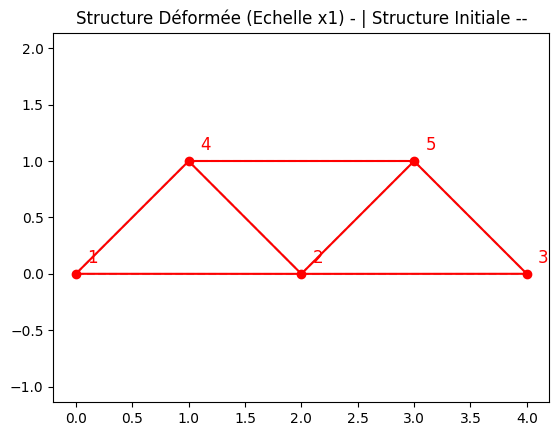

In [ ]:
import matplotlib.pyplot as plt


echelle = 1

plt.figure()

for i in range(int(Nr)):
    n1 = int(Connec[i, 0]) - 1
    n2 = int(Connec[i, 1]) - 1

    plt.plot([Coord[n1, 0], Coord[n2, 0]], [Coord[n1, 1], Coord[n2, 1]], 'k--', alpha=0.3)
    x1 = Coord[n1, 0] + q[2*n1] * echelle
    y1 = Coord[n1, 1] + q[2*n1+1] * echelle
    x2 = Coord[n2, 0] + q[2*n2] * echelle
    y2 = Coord[n2, 1] + q[2*n2+1] * echelle

    plt.plot([x1, x2], [y1, y2], 'r-')

for i in range(int(Nn)):
    x = Coord[i, 0] + q[2*i] * echelle
    y = Coord[i, 1] + q[2*i+1] * echelle

    plt.plot(x, y, 'ro')
    plt.text(x + 0.1, y + 0.1, str(i+1), color='red', fontsize=12)

plt.axis('equal')
plt.title(f"Structure Déformée (Echelle x{echelle}) - | Structure Initiale --")
plt.show()